<a href="https://colab.research.google.com/github/Alexiserges/Analysis_covid19_over_the-_World/blob/main/analysis_of_covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#To download the file locally
#import urllib
#url = "https://covid.ourworldindata.org/data/ecdc/full_data.csv"
#urllib.request.urlretrieve (url, "data/full_data.csv")

import pandas as pd
import datetime as dt
from matplotlib import pyplot as plt
import matplotlib

In [4]:

#date	location	new_cases	new_deaths	total_cases	total_deaths
df = pd.read_csv("/content/owid-covid-data.csv")
print(df.head())
print(df.dtypes)

  iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-02-24          5.0        5.0   
1      AFG      Asia  Afghanistan  2020-02-25          5.0        0.0   
2      AFG      Asia  Afghanistan  2020-02-26          5.0        0.0   
3      AFG      Asia  Afghanistan  2020-02-27          5.0        0.0   
4      AFG      Asia  Afghanistan  2020-02-28          5.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           NaN         NaN                  NaN  ...   
1                 NaN           NaN         NaN                  NaN  ...   
2                 NaN           NaN         NaN                  NaN  ...   
3                 NaN           NaN         NaN                  NaN  ...   
4                 NaN           NaN         NaN                  NaN  ...   

   female_smokers  male_smokers  handwashing_facilities  \
0             NaN           NaN        

In [5]:
#dateFormat = '%Y-%m-%d'
# Convert string values of date to datetime format
df['date'] = [dt.datetime.strptime(x,'%Y-%m-%d') for x in df['date']] 
#print(CVD.dtypes)

In [6]:
#Let's look at multiple countries
countries=['United States', 'Malaysia', 'France']
df_country = df[df.location.isin(countries)]  #Create subset data frame for select countries

In [7]:
df_country.set_index('date', inplace=True)  #Make date the index for easy plotting

In [10]:
#To calculate mortality rate
df_country['mortality_rate'] = df_country['total_deaths']/df_country['total_cases']
#print(df_country.tail())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


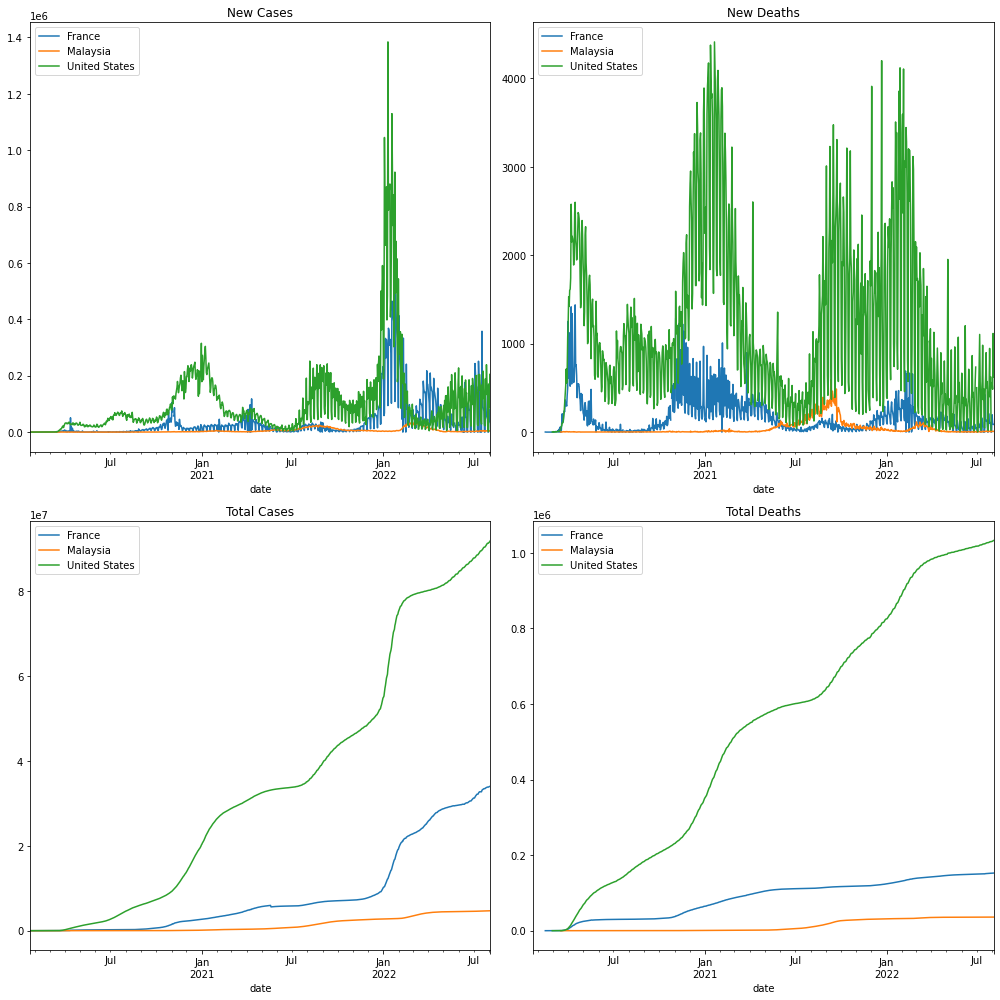

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14,14))

df_country.groupby('location')['new_cases'].plot(ax=axes[0,0], legend=True) #for log scale add logy=True
df_country.groupby('location')['new_deaths'].plot(ax=axes[0,1], legend=True)
df_country.groupby('location')['total_cases'].plot(ax=axes[1,0], legend=True)
df_country.groupby('location')['total_deaths'].plot(ax=axes[1,1], legend=True)
#CVD_country.groupby('location')['mortality_rate'].plot(ax=axes[1,1], legend=True)

axes[0, 0].set_title("New Cases")
axes[0, 1].set_title("New Deaths")
axes[1, 0].set_title("Total Cases")
axes[1, 1].set_title("Total Deaths")

fig.tight_layout()  # adjust subplot parameters to give specified padding.